### Import libraries:

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Metadata:

In [6]:
## This metadata should match to file names and number of files 
stateLabel = 'Florida'
countyLabel = 'Pinellas'

rangeList = ['0.0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8',
           '0.8-0.9','0.9-1.0','1.0-1.1','1.1-1.2','1.2-1.3','1.3-1.4','1.4-1.5','1.5-1.6',
           '1.6-1.7','1.7-1.8','1.8-1.9','1.9-2.0','2.0-2.1','2.1-2.2','2.2-2.3','2.3-2.4',
           '2.4-2.5','2.5-2.6','2.6-2.7','2.7-2.8','2.8-2.9','2.9-3.0','3.0-3.1','3.1-3.2',
           '3.2-3.3','3.3-3.4','3.4-3.5','3.5-3.6','3.6-3.7','3.7-3.8','3.8-3.9','3.9-4.0',
           '4.0-4.1','4.1-4.2','4.2-4.3','4.3-4.4','4.4-4.5','4.5-4.6','4.6-4.7','4.7-4.8',
           '4.8-4.9','4.9-5.0']
demList = [0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65,1.75,
           1.85,1.95,2.05,2.15,2.25,2.35,2.45,2.55,2.65,2.75,2.85,2.95,3.05,3.15,3.25,3.35,3.45,3.55,
           3.65,3.75,3.85,3.95,4.05,4.15,4.25,4.35,4.45,4.55,4.65,4.75,4.85,4.95]

classes = ['Soil','Water','Dead grass','Marsh','Scrub','Grass','Forested upland','Forested wetland','Developed']
codes = [2,3,4,5,6,7,8,9,10]
dataset = []

### Load and parse data:

In [11]:
for x in range(len(rangeList)):
    rangeLabel = rangeList[x]
    dem = demList[x]
    
    FILEPATH = 'data/'+stateLabel+'_'+countyLabel+'_'+rangeLabel+'_m.csv'
    
    ## Load and parse the data
    data = pd.read_csv(FILEPATH)\
            .drop(columns=['system:index','.geo','class'],index=0).reset_index(drop=True)
    
    for c in range(len(codes)):
        if codes[c] not in data['code'].values:
            row = {'area_km2':0,'code':codes[c],'county':countyLabel,'state':stateLabel}
            data = data.append(row,ignore_index=True)
    
    ## add columns with labels
    #data['class'] = pd.Series([rangeLabel for x in range(len(data.index))])
    data['range_m'] = pd.Series([rangeLabel for x in range(len(data.index))])
    data['elevation_m'] = pd.Series([dem for x in range(len(data.index))])
    
    ## get proportions
    areas = data['area_km2']
    # Change: groupby state_office and divide by sum
    proportions = areas.apply(lambda y: (y / float(areas.sum()))*100)
    data['proportion%'] = proportions
    
    ## sort by codes and add respective class labels
    data=data.sort_values(by=['code'],ascending=True).reset_index(drop=True)
    #data['class'] = pd.Series([classes[x] for x in range(len(data.index))])
    data.insert(1,'class',pd.Series([classes[x] for x in range(len(data.index))]))
    ## append
    dataset.append(data)

## Put all the data in a single dataframe:
fileCounty = pd.concat(dataset).reset_index(drop=True)

In [ ]:
## save file
# fileCounty.to_excel(stateLabel+'_'+countyLabel+'_0.0-5.0_m.xlsx')

### Figures:

In [12]:
 ## Palette color codes
palette = {'Soil':"#621E01",'Water':"#1F59CC",'Dead grass':"#E2D924",'Marsh':"#7CCD11",
           'Scrub':"#AD6309",'Grass':"#27D310",'Forested upland':"#106F00",
           'Forested wetland':"#1EE682",'Developed':"#1E1E1E"}

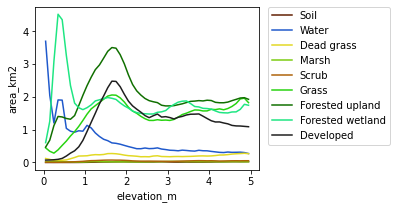

In [13]:
## figure 1
fig1, axes1 = plt.subplots(1, 1, figsize=(4,3), sharex=True)
x1="elevation_m"
y1='area_km2'
plt1 = sns.lineplot(data=fileCounty, y=y1, x=x1, hue='class',palette=palette)
plt.legend(bbox_to_anchor=(1.04,1),borderaxespad=0)

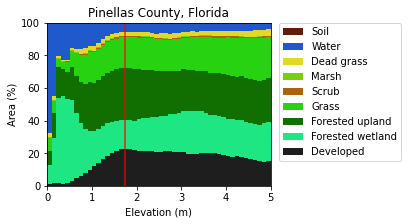

In [14]:
## Figure 2
fig2, axes2 = plt.subplots(1, 1, figsize=(4,3), sharex=True)
y2='proportion%'
x2='elevation_m'
classes = ['Soil','Water','Dead grass','Marsh','Scrub','Grass','Forested upland','Forested wetland','Developed']
colors = ['#621E01','#1F59CC','#E2D924','#7CCD11','#AD6309','#27D310','#106F00','#1EE682','#1E1E1E']
# figure and axis
bary9 = np.array(fileCounty.loc[fileCounty['code'] == 2][y2])
bary8 = np.array(fileCounty.loc[fileCounty['code'] == 3][y2])
bary7 = np.array(fileCounty.loc[fileCounty['code'] == 4][y2])
bary6 = np.array(fileCounty.loc[fileCounty['code'] == 5][y2])
bary5 = np.array(fileCounty.loc[fileCounty['code'] == 6][y2])
bary4 = np.array(fileCounty.loc[fileCounty['code'] == 7][y2])
bary3 = np.array(fileCounty.loc[fileCounty['code'] == 8][y2])
bary2 = np.array(fileCounty.loc[fileCounty['code'] == 9][y2])
bary1 = np.array(fileCounty.loc[fileCounty['code'] == 10][y2])

# plot bars
w=0.1
bar1 = plt.bar(np.array(demList),bary1,width=w,color=colors[8],label=classes[8])
bar2 = plt.bar(demList,bary2,bottom=bary1,width=w,color=colors[7],label=classes[7])
bar3 = plt.bar(demList,bary3,bottom=bary1+bary2,width=w,color=colors[6],label=classes[6])
bar4 = plt.bar(demList,bary4,bottom=bary1+bary2+bary3,width=w,color=colors[5],label=classes[5])
bar5 = plt.bar(demList,bary5,bottom=bary1+bary2+bary3+bary4,width=w,color=colors[4],label=classes[4])
bar6 = plt.bar(demList,bary6,bottom=bary1+bary2+bary3+bary4+bary5,width=w,color=colors[3],label=classes[3])
bar7 = plt.bar(demList,bary7,bottom=bary1+bary2+bary3+bary4+bary5+bary6,width=w,color=colors[2],label=classes[2])
bar8 = plt.bar(demList,bary8,bottom=bary1+bary2+bary3+bary4+bary5+bary6+bary7,width=w,color=colors[1],label=classes[1])
bar9 = plt.bar(demList,bary9,bottom=bary1+bary2+bary3+bary4+bary5+bary6+bary7++bary8,width=w,color=colors[0],label=classes[0])
if countyLabel == 'Pinellas':
    line = plt.axvline(x=1.73,color='red',alpha=0.8)
elif countyLabel == 'Nueces':
    line = plt.axvline(x=2.72,color='red',alpha=0.8)
elif countyLabel == 'Terrebonne':
    line = plt.axvline(x=4.58,color='red',alpha=0.8)

axes2.set_ylim([0,100])
axes2.set_xlim([0,5.0])
plt.xlabel('Elevation (m)')
plt.ylabel('Area (%)')
plt.title(countyLabel+' County, '+stateLabel)
#plt.legend(classes[::-1])
handles,labels = axes2.get_legend_handles_labels()
axes2.legend(handles[::-1],labels[::-1],bbox_to_anchor=(1.04,1),borderaxespad=0)

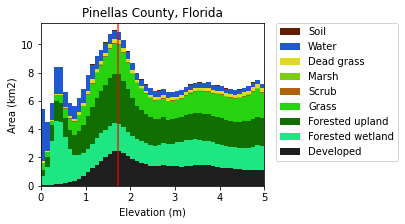

In [15]:
## Figure 3
fig3, axes3 = plt.subplots(1, 1, figsize=(4,3), sharex=True)
y2=y1
x2='elevation_m'
# figure and axis
bary9 = np.array(fileCounty.loc[fileCounty['code'] == 2][y2])
bary8 = np.array(fileCounty.loc[fileCounty['code'] == 3][y2])
bary7 = np.array(fileCounty.loc[fileCounty['code'] == 4][y2])
bary6 = np.array(fileCounty.loc[fileCounty['code'] == 5][y2])
bary5 = np.array(fileCounty.loc[fileCounty['code'] == 6][y2])
bary4 = np.array(fileCounty.loc[fileCounty['code'] == 7][y2])
bary3 = np.array(fileCounty.loc[fileCounty['code'] == 8][y2])
bary2 = np.array(fileCounty.loc[fileCounty['code'] == 9][y2])
bary1 = np.array(fileCounty.loc[fileCounty['code'] == 10][y2])

# plot bars
w=0.1
bar1 = plt.bar(np.array(demList),bary1,width=w,color=colors[8],label=classes[8])
bar2 = plt.bar(demList,bary2,bottom=bary1,width=w,color=colors[7],label=classes[7])
bar3 = plt.bar(demList,bary3,bottom=bary1+bary2,width=w,color=colors[6],label=classes[6])
bar4 = plt.bar(demList,bary4,bottom=bary1+bary2+bary3,width=w,color=colors[5],label=classes[5])
bar5 = plt.bar(demList,bary5,bottom=bary1+bary2+bary3+bary4,width=w,color=colors[4],label=classes[4])
bar6 = plt.bar(demList,bary6,bottom=bary1+bary2+bary3+bary4+bary5,width=w,color=colors[3],label=classes[3])
bar7 = plt.bar(demList,bary7,bottom=bary1+bary2+bary3+bary4+bary5+bary6,width=w,color=colors[2],label=classes[2])
bar8 = plt.bar(demList,bary8,bottom=bary1+bary2+bary3+bary4+bary5+bary6+bary7,width=w,color=colors[1],label=classes[1])
bar9 = plt.bar(demList,bary9,bottom=bary1+bary2+bary3+bary4+bary5+bary6+bary7++bary8,width=w,color=colors[0],label=classes[0])
if countyLabel == 'Pinellas':
    line = plt.axvline(x=1.73,color='red',alpha=0.8)
elif countyLabel == 'Nueces':
    line = plt.axvline(x=2.72,color='red',alpha=0.8)
elif countyLabel == 'Terrebonne':
    line = plt.axvline(x=4.58,color='red',alpha=0.8)

# axes3.set_ylim([0,100])
axes3.set_xlim([0,5.0])
plt.xlabel('Elevation (m)')
plt.ylabel('Area (km2)')
plt.title(countyLabel+' County, '+stateLabel)
handles,labels = axes3.get_legend_handles_labels()
axes3.legend(handles[::-1],labels[::-1],bbox_to_anchor=(1.60,1),borderaxespad=0)